In [312]:
#import necessarey libraries
import numpy as mp
import pandas as da
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score

#dataset features determine if the ground is rock or mine(binary format)
df = pd.read_csv('sonarnew.csv')
X = df.drop(['Class'], axis='columns')
y = df.Class


In [314]:
#splitting of data to train and test 80 to 20 percent respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)



In [315]:
#arrays to matrices for easier numerical computations
X_train = mp.asmatrix(pd.DataFrame(X_train), dtype = 'float64')
y_train = mp.asmatrix(pd.DataFrame(y_train), dtype = 'float64')
X_test = mp.asmatrix(pd.DataFrame(X_test), dtype = 'float64')
y_test = mp.array(pd.DataFrame(y_test), dtype = 'float64')



training_inputs = X_train
labels = y_train



In [316]:
#preceptron class for training and testing
class Neuron(object):

    def __init__(self, no_of_feature, max_epoch=100, learning_rate=0.01):
        self.max_epoch = max_epoch
        self.learning_rate = learning_rate
        self.weight = mp.zeros(no_of_feature + 1)
        print(self.weight.shape)
        
#prediction fucntion  

    def prediction(self, inputs):
        summ = mp.dot(inputs, self.weight[1:]) + self.weight[0]
        d=self.step(summ)
        return d
        
#activation fucntion is a step function 

    def step(self,summ):
        if summ > 0:
            activation= 1
        else:
            activation = 0
        return activation
    
#training fucntion

    def train(self, training_inputs, labels):
        for i in range(self.max_epoch):
            for inputs, label in zip(training_inputs, labels):
                predict = self.prediction(inputs)
                self.weight[1:] += mp.array(self.learning_rate * (label[0] - predict) * mp.array(inputs)[0])[0]
                self.weight[0] += mp.array(self.learning_rate * (label[0] - predict))[0]
            print("Epoch no\t"+str(i+1),"\tLearning rate\t"+str(self.learning_rate),"\nNew weight"+str(self.weight)) 
            

In [317]:
#passing arguments as no of features
perceptron = Neuron(60)
#start train
perceptron.train(training_inputs, labels)


(61,)
Epoch no	1 	Learning rate	0.01 
New weight[ 0.0000e+00  4.4260e-03  5.3980e-03  2.4790e-03  8.1550e-03  6.5660e-03
 -2.4240e-03 -3.2150e-03  5.2280e-03  2.4882e-02  3.1254e-02  3.0386e-02
  1.9182e-02  6.8930e-03 -1.4980e-03  1.7200e-03  4.7400e-03 -2.7730e-03
 -1.1271e-02 -7.5330e-03  5.4580e-03  1.2076e-02  6.5140e-03 -3.2600e-03
 -3.1070e-03 -7.4230e-03 -7.4680e-03 -7.5100e-03  7.3330e-03 -4.6040e-03
  7.1900e-04 -7.6750e-03  7.3650e-03 -5.6870e-03 -1.2996e-02 -8.8230e-03
 -9.9300e-03 -8.2820e-03  3.8080e-03  9.5820e-03 -3.5000e-04  9.6260e-03
  2.0759e-02  2.3417e-02  2.8896e-02  3.2352e-02  2.5403e-02  1.5880e-02
  1.5566e-02  9.0140e-03  1.6190e-03  1.3840e-03  1.6570e-03  1.3590e-03
  1.4240e-03  3.3500e-04  4.3800e-04  8.5000e-05  1.3190e-03  5.9900e-04
  2.9700e-04]
Epoch no	2 	Learning rate	0.01 
New weight[ 0.0000e+00  5.8930e-03  7.5720e-03  2.6400e-03  1.3272e-02  1.0467e-02
 -4.2910e-03 -7.0670e-03  6.0650e-03  4.0305e-02  4.9027e-02  4.4226e-02
  2.6826e-02  4.4530

Epoch no	18 	Learning rate	0.01 
New weight[-7.00000e-02  2.58060e-02  2.88320e-02 -3.17500e-03  8.14810e-02
  5.26440e-02 -5.46060e-02 -6.95010e-02 -2.25090e-02  8.78840e-02
  9.31700e-02  1.20293e-01  2.92510e-02 -3.41420e-02 -7.85540e-02
 -3.86890e-02 -1.69000e-03  2.08730e-02  1.06000e-04  2.68940e-02
  1.43180e-02  2.25980e-02 -2.72810e-02 -1.60430e-02  7.18960e-02
 -6.96900e-03 -4.90040e-02 -2.63020e-02  7.65420e-02  1.20600e-03
  1.89190e-02 -1.57934e-01  3.93720e-02  2.64030e-02 -3.29740e-02
  4.59200e-03 -7.86200e-03 -9.21630e-02 -4.89000e-04  6.59840e-02
 -6.98410e-02  1.61940e-02  2.63670e-02  6.15010e-02  8.97660e-02
  9.22810e-02  6.25360e-02  8.51590e-02  1.32455e-01  8.09390e-02
  8.62500e-03  2.02340e-02  1.60760e-02  9.39700e-03  1.43710e-02
 -3.10000e-03  4.99200e-03 -3.29800e-03  9.85200e-03  7.72800e-03
  5.52000e-03]
Epoch no	19 	Learning rate	0.01 
New weight[-0.08      0.02612   0.029947 -0.003986  0.084201  0.05511  -0.054381
 -0.071159 -0.021661  0.089894  0.09

Epoch no	37 	Learning rate	0.01 
New weight[-0.09      0.041511  0.047853 -0.009498  0.143974  0.084162 -0.09407
 -0.134561 -0.061128  0.097628  0.111264  0.187811  0.055817 -0.019154
 -0.103971 -0.026474  0.026666  0.040123 -0.011795  0.034227  0.013728
  0.020412 -0.035117 -0.051819  0.094483 -0.004049 -0.072691 -0.046193
  0.092225 -0.012651  0.060666 -0.230186  0.06745   0.036575 -0.073672
 -0.00114   0.001995 -0.134316 -0.010568  0.076788 -0.100712  0.020255
  0.024317  0.067452  0.092389  0.083661  0.017532  0.113485  0.212922
  0.124985  0.008114  0.039088  0.032485  0.018957  0.029021 -0.005519
  0.008555 -0.007148  0.01761   0.017842  0.013661]
Epoch no	38 	Learning rate	0.01 
New weight[-9.00000e-02  4.14270e-02  4.79340e-02 -1.03650e-02  1.47087e-01
  8.69130e-02 -9.42220e-02 -1.37083e-01 -6.16970e-02  9.85050e-02
  1.10892e-01  1.88198e-01  5.47170e-02 -2.22470e-02 -1.06854e-01
 -2.51530e-02  3.16360e-02  4.25880e-02 -1.04930e-02  3.28470e-02
  1.12060e-02  1.85060e-02 -3.3

Epoch no	54 	Learning rate	0.01 
New weight[-0.11      0.058744  0.057032 -0.021545  0.187766  0.111069 -0.1
 -0.162651 -0.079776  0.094026  0.115829  0.213936  0.055774 -0.009072
 -0.10026  -0.024254  0.014902  0.010473 -0.027979  0.032007  0.005143
  0.007648 -0.020525 -0.029026  0.103655 -0.017393 -0.084732 -0.046337
  0.087653 -0.026653  0.097565 -0.258819  0.067514  0.042806 -0.09681
  0.003571 -0.000933 -0.159412 -0.007741  0.094098 -0.10295   0.032121
  0.023559  0.077937  0.10944   0.092344 -0.02267   0.128861  0.269488
  0.159203  0.005119  0.054318  0.045409  0.025332  0.037573 -0.009241
  0.009908 -0.013476  0.022928  0.024378  0.019379]
Epoch no	55 	Learning rate	0.01 
New weight[-0.11      0.05936   0.057607 -0.023332  0.190168  0.114789 -0.099477
 -0.163597 -0.083899  0.090619  0.112674  0.212635  0.054309 -0.005373
 -0.097096 -0.021598  0.020815  0.016748 -0.019087  0.041659  0.012034
  0.007883 -0.019012 -0.029502  0.106207 -0.009413 -0.077958 -0.041889
  0.09094  -0.02

Epoch no	73 	Learning rate	0.01 
New weight[-1.20000e-01  7.46660e-02  6.92370e-02 -3.83040e-02  2.22554e-01
  1.20550e-01 -1.21031e-01 -1.90888e-01 -1.05479e-01  8.98380e-02
  1.03470e-01  2.22448e-01  4.40210e-02 -1.14640e-02 -1.05342e-01
 -2.07840e-02  2.13680e-02 -4.35200e-03 -2.47100e-02  3.66800e-02
  9.57400e-03  1.16280e-02 -1.88490e-02 -3.21740e-02  1.29224e-01
  1.95090e-02 -6.27750e-02 -3.02110e-02  1.00041e-01 -4.02770e-02
  1.20379e-01 -2.98882e-01  9.07330e-02  6.74260e-02 -1.05364e-01
  2.00440e-02 -6.80000e-05 -1.71023e-01 -6.35800e-03  8.20420e-02
 -9.94050e-02  3.55300e-02  2.71100e-03  6.63890e-02  1.11727e-01
  8.02270e-02 -6.86880e-02  1.42612e-01  3.26035e-01  1.97325e-01
  3.39600e-03  6.97220e-02  5.72590e-02  3.16900e-02  4.60620e-02
 -1.24310e-02  1.05410e-02 -1.88520e-02  2.88090e-02  3.13270e-02
  2.68210e-02]
Epoch no	74 	Learning rate	0.01 
New weight[-0.12      0.077412  0.070675 -0.039875  0.225587  0.12134  -0.118692
 -0.185537 -0.09668   0.097027  0.10

Epoch no	93 	Learning rate	0.01 
New weight[-1.30000e-01  8.70880e-02  7.96410e-02 -5.89930e-02  2.64767e-01
  1.41356e-01 -1.14297e-01 -2.00289e-01 -1.16499e-01  1.13887e-01
  1.20926e-01  2.42078e-01  3.52830e-02 -5.40100e-03 -1.18103e-01
 -2.48260e-02  1.90320e-02 -1.18110e-02 -1.20100e-03  4.38010e-02
 -1.89000e-04  2.64040e-02 -4.01100e-03 -4.75890e-02  1.12780e-01
  1.45480e-02 -7.39090e-02 -4.42520e-02  1.01641e-01 -5.76830e-02
  1.56688e-01 -3.33312e-01  7.98780e-02  5.77930e-02 -1.14758e-01
  3.47840e-02 -1.62200e-03 -1.80490e-01  2.68630e-02  7.52650e-02
 -1.09280e-01  5.05540e-02  3.53300e-03  7.52010e-02  1.25375e-01
  8.55130e-02 -1.09008e-01  1.50843e-01  3.77071e-01  2.30814e-01
 -7.80000e-05  8.72340e-02  7.05360e-02  3.88680e-02  5.41510e-02
 -1.59890e-02  1.04800e-02 -2.53240e-02  3.40610e-02  3.56960e-02
  3.24100e-02]
Epoch no	94 	Learning rate	0.01 
New weight[-1.30000e-01  8.82640e-02  8.09460e-02 -6.05690e-02  2.66951e-01
  1.44787e-01 -1.11564e-01 -2.00126e-01 -

In [318]:
#saving of predicted output to a variable
a=mp.array([])
x=a

for i in range(X_test.shape[0]):
    output=perceptron.prediction(X_test[i])
    x=mp.append(x,[output],axis=0)
    
print("predicted test output\n",x)

#printing of accuracy metrics
a=confusion_matrix(y_test,x)
print("Confusion Matrix\n"+str(confusion_matrix(y_test, x)))
tn=a[0][0]
fp=a[0][1]
fn=a[1][0]
tp=a[1][1]


print("Accuracy _score\t"+str(accuracy_score(y_test, x)))
a=(tp+tn)/(tp+tn+fp+fn)
print("Accuracy using formula",a)
print("Recall Score\t"+str(recall_score(y_test, x, average='binary')))
r=tp/(tp+fn)
print("Recall using formula",r)
print("Precision score\t"+str(precision_score(y_test, x, average='binary')))
p=tp/(tp+fp)
print("precision using formula",p)

predicted test output
 [0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0.]
Confusion Matrix
[[17  2]
 [ 7 16]]
Accuracy _score	0.7857142857142857
Accuracy using formula 0.7857142857142857
Recall Score	0.6956521739130435
Recall using formula 0.6956521739130435
Precision score	0.8888888888888888
precision using formula 0.8888888888888888


[[17  2]
 [ 7 16]]


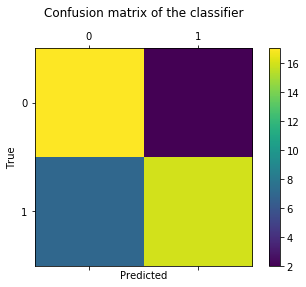

In [319]:
#visualization of confusion matrix
labels = [0,1]
cm = confusion_matrix(y_test, x,labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier\n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()